In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import re
import nltk
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import plot_partial_dependence
import shap

ModuleNotFoundError: No module named 'shap'

In [134]:
fhand = pd.read_csv("langtrends.csv")

In [135]:
fhand.head()

,Date,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi/Pascal,Go,Groovy,...,Powershell,Python,R,Ruby,Rust,Scala,Swift,TypeScript,VBA,Visual Basic
0,July 2004,0.34,0.36,10.01,4.68,0.42,0.0,2.80,0.0,0.03,...,0.16,2.51,0.39,0.33,0.24,0.17,0.0,0.0,1.43,8.50
1,August 2004,0.35,0.36,9.74,4.96,0.46,0.0,2.65,0.0,0.07,...,0.15,2.62,0.40,0.40,0.19,0.17,0.0,0.0,1.45,8.51
2,September 2004,0.41,0.41,9.59,5.04,0.51,0.0,2.64,0.0,0.08,...,0.08,2.71,0.40,0.41,0.17,0.13,0.0,0.0,1.54,8.38
3,October 2004,0.40,0.38,9.47,5.29,0.53,0.0,2.76,0.0,0.09,...,0.12,2.91,0.42,0.46,0.12,0.14,0.0,0.0,1.61,8.46
4,November 2004,0.38,0.38,9.48,5.22,0.55,0.0,2.75,0.0,0.07,...,0.12,2.83,0.41,0.44,0.17,0.15,0.0,0.0,1.50,8.21


In [136]:
deephand = pd.read_csv("langdata.csv")

In [137]:
deephand.head()

,pldb_id,title,description,type,appeared,creators,website,domain_name,domain_name_registered,reference,...,features_has_semantic_indentation,features_has_line_comments,line_comment_token,last_activity,number_of_users,number_of_jobs,origin_community,central_package_repository_count,file_type,is_open_source
0,java,Java,NaN,pl,1995,James Gosling,https://oracle.com/java/,NaN,NaN,NaN,...,False,True,//,2022,5550123,85206,Sun Microsystems,NaN,text,NaN
1,javascript,JavaScript,NaN,pl,1995,Brendan Eich,NaN,NaN,NaN,https://www.w3schools.com/js/js_reserved.asp,...,False,True,//,2022,5962666,63993,Netscape,NaN,text,NaN
2,c,C,NaN,pl,1972,Dennis Ritchie,NaN,NaN,NaN,http://www.c4learn.com/c-programming/c-keywords/,...,False,True,//,2022,3793768,59919,Bell Labs,0.0,text,NaN
3,python,Python,NaN,pl,1991,Guido van Rossum,https://www.python.org/,python.org,1995.0,https://www.programiz.com/python-programming/k...,...,True,True,#,2022,2818037,46976,Centrum Wiskunde & Informatica,NaN,text,NaN
4,sql,SQL,NaN,queryLanguage,1974,Donald D. Chamberlin and Raymond F. Boyce,NaN,NaN,NaN,NaN,...,False,True,--,2022,7179119,219617,IBM,0.0,text,NaN


In [138]:
deephand.columns

Index(['pldb_id', 'title', 'description', 'type', 'appeared', 'creators',
       'website', 'domain_name', 'domain_name_registered', 'reference',
       'isbndb', 'book_count', 'semantic_scholar', 'language_rank',
       'github_repo', 'github_repo_stars', 'github_repo_forks',
       'github_repo_updated', 'github_repo_subscribers', 'github_repo_created',
       'github_repo_description', 'github_repo_issues',
       'github_repo_first_commit', 'github_language',
       'github_language_tm_scope', 'github_language_type',
       'github_language_ace_mode', 'github_language_file_extensions',
       'github_language_repos', 'wikipedia', 'wikipedia_daily_page_views',
       'wikipedia_backlinks_count', 'wikipedia_summary', 'wikipedia_page_id',
       'wikipedia_appeared', 'wikipedia_created', 'wikipedia_revision_count',
       'wikipedia_related', 'features_has_comments',
       'features_has_semantic_indentation', 'features_has_line_comments',
       'line_comment_token', 'last_activity',

In [139]:
deephand.head(10)

,pldb_id,title,description,type,appeared,creators,website,domain_name,domain_name_registered,reference,...,features_has_semantic_indentation,features_has_line_comments,line_comment_token,last_activity,number_of_users,number_of_jobs,origin_community,central_package_repository_count,file_type,is_open_source
0,java,Java,NaN,pl,1995,James Gosling,https://oracle.com/java/,NaN,NaN,NaN,...,False,True,//,2022,5550123,85206,Sun Microsystems,NaN,text,NaN
1,javascript,JavaScript,NaN,pl,1995,Brendan Eich,NaN,NaN,NaN,https://www.w3schools.com/js/js_reserved.asp,...,False,True,//,2022,5962666,63993,Netscape,NaN,text,NaN
2,c,C,NaN,pl,1972,Dennis Ritchie,NaN,NaN,NaN,http://www.c4learn.com/c-programming/c-keywords/,...,False,True,//,2022,3793768,59919,Bell Labs,0.0,text,NaN
3,python,Python,NaN,pl,1991,Guido van Rossum,https://www.python.org/,python.org,1995.0,https://www.programiz.com/python-programming/k...,...,True,True,#,2022,2818037,46976,Centrum Wiskunde & Informatica,NaN,text,NaN
4,sql,SQL,NaN,queryLanguage,1974,Donald D. Chamberlin and Raymond F. Boyce,NaN,NaN,NaN,NaN,...,False,True,--,2022,7179119,219617,IBM,0.0,text,NaN
5,cpp,C++,NaN,pl,1985,Bjarne Stroustrup,http://isocpp.org/,isocpp.org,2012.0,NaN,...,NaN,NaN,//,2022,4128238,61098,Bell Labs,0.0,text,NaN
6,html,HTML,NaN,textMarkup,1991,Tim Berners-Lee,NaN,NaN,NaN,NaN,...,False,False,NaN,2022,5570873,69531,Conseil Européen pour la Recherche Nucléaire,0.0,text,NaN
7,xml,XML,NaN,dataNotation,1996,NaN,NaN,NaN,NaN,NaN,...,False,False,NaN,2022,1917452,42277,NaN,0.0,text,NaN
8,php,PHP,NaN,pl,1995,Rasmus Lerdorf,https://php.net,php.net,1997.0,http://php.net/manual/en/reserved.keywords.php,...,False,True,//,2022,2356101,30349,Zend,NaN,text,NaN
9,perl,Perl,NaN,pl,1987,Larry Wall,https://www.perl.org,perl.org,1995.0,NaN,...,False,True,#,2022,491984,13482,Unisys,NaN,text,NaN


In [140]:
fhand['Date'] = pd.to_datetime(fhand['Date'])

In [141]:
fhand.set_index('Date', inplace=True)

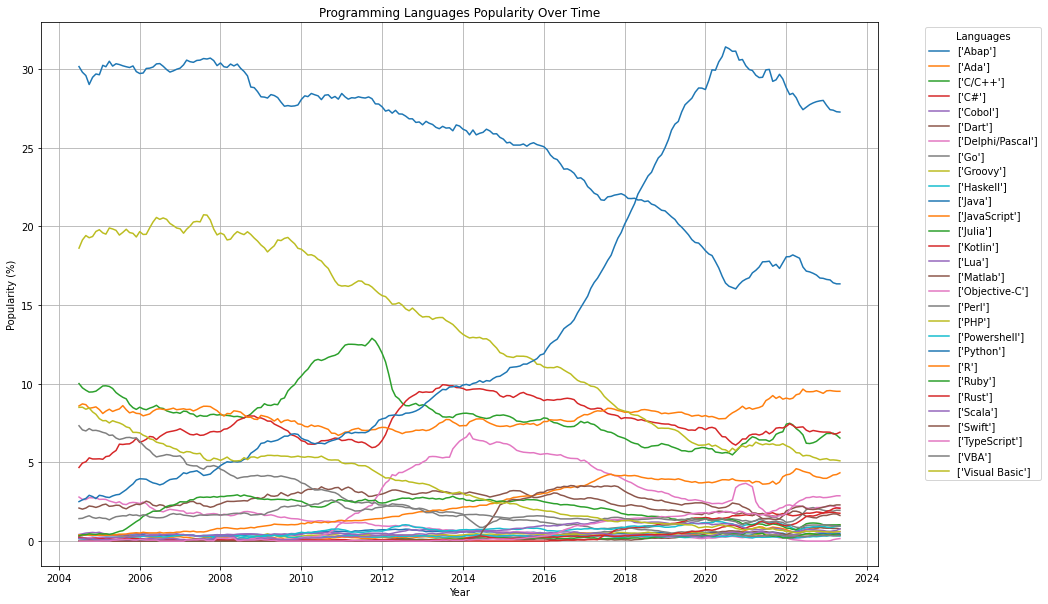

In [142]:
plt.figure(figsize=(15,10))
for column in fhand.columns:
    plt.plot(fhand.index, fhand[column], label=[column])
plt.title('Programming Languages Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Popularity (%)')
plt.legend(title='Languages', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend out of the plot
plt.grid(True)
plt.show()

In [143]:
# Too many languages consistently under 2 percent of popularity so lets get rid of them
languages_to_drop = [
    'Abap', 'Ada', 'Cobol', 'Dart', 'Go', 
    'Groovy', 'Haskell', 'Julia', 'Kotlin', 'Lua', 'Powershell', 'Ruby', 'Scala', 'VBA'
]

filtered_df = fhand.drop(columns=languages_to_drop)

print(filtered_df.columns)

Index(['C/C++', 'C#', 'Delphi/Pascal', 'Java', 'JavaScript', 'Matlab',
       'Objective-C', 'Perl', 'PHP', 'Python', 'R', 'Rust', 'Swift',
       'TypeScript', 'Visual Basic'],
      dtype='object')


In [144]:
# lets see what it looks like now

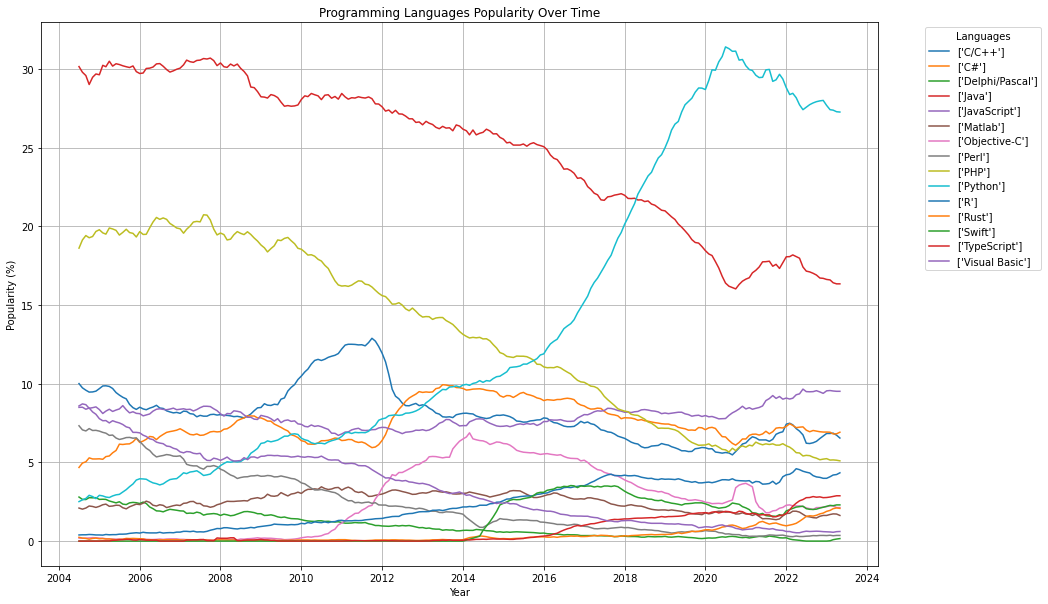

In [145]:
plt.figure(figsize=(15,10))
for column in filtered_df.columns:
    plt.plot(filtered_df.index, filtered_df[column], label=[column])
plt.title('Programming Languages Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Popularity (%)')
plt.legend(title='Languages', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend out of the plot
plt.grid(True)
plt.show()

In [146]:
# A lot of movement with certain languages so lets clarify with top ten from start and end points
july_2004_data = fhand.loc['2004-07-01']

top_ten_july_2004 = july_2004_data.sort_values(ascending=False)[:10]

print(top_ten_july_2004)

Java             30.16
PHP              18.62
C/C++            10.01
JavaScript        8.59
Visual Basic      8.50
Perl              7.33
C#                4.68
Delphi/Pascal     2.80
Python            2.51
Matlab            2.10
Name: 2004-07-01 00:00:00, dtype: float64


In [147]:
may_2023_data = fhand.loc['2023-05-01']

top_ten_may_2023 = may_2023_data.sort_values(ascending=False)[:10]

print(top_ten_may_2023)

Python         27.27
Java           16.35
JavaScript      9.52
C#              6.92
C/C++           6.55
PHP             5.10
R               4.34
TypeScript      2.88
Swift           2.30
Objective-C     2.13
Name: 2023-05-01 00:00:00, dtype: float64


In [148]:
# Now I will begin merging datasets, I will take the average of the last year available scores for the
# most popular languages and then I will proceed to use those scores in conjunction with data from the detailed 
# dataset to draw clearer conclusions.

popularityRange = filtered_df.loc['2022-05-01':'2023-05-01']

popularityScores = popularityRange.mean()

popularityScores = popularityScores.reset_index()
popularityScores.columns = ['title', 'average_popularity_percentage_over_100']

print(popularityScores.head())

           title  average_popularity_percentage_over_100
0          C/C++                                6.597692
1             C#                                6.984615
2  Delphi/Pascal                                0.036154
3           Java                               16.874615
4     JavaScript                                9.510769


In [149]:
popularityScores

,title,average_popularity_percentage_over_100
0,C/C++,6.597692
1,C#,6.984615
2,Delphi/Pascal,0.036154
3,Java,16.874615
4,JavaScript,9.510769
5,Matlab,1.632308
6,Objective-C,2.150769
7,Perl,0.338462
8,PHP,5.281538
9,Python,27.638462


In [150]:
popularityScores["average_popularity_percentage_over_100"].sum()

88.54307692307692

In [151]:
#Amazingly enough the total scores of the top 15 languages constitutes over 88% of the total popularity, the remaining fifteen
#dont even make up 15%

In [152]:
#Time to merge the data
ultimateData = pd.merge(popularityScores, deephand, on="title", how='inner')


In [153]:
ultimateData

,title,average_popularity_percentage_over_100,pldb_id,description,type,appeared,creators,website,domain_name,domain_name_registered,...,features_has_semantic_indentation,features_has_line_comments,line_comment_token,last_activity,number_of_users,number_of_jobs,origin_community,central_package_repository_count,file_type,is_open_source
0,C#,6.984615,csharp,NaN,pl,2000,Anders Hejlsberg,https://docs.microsoft.com/dotnet/csharp/langu...,NaN,NaN,...,False,True,//,2022,217261,19747,Microsoft,NaN,text,NaN
1,Java,16.874615,java,NaN,pl,1995,James Gosling,https://oracle.com/java/,NaN,NaN,...,False,True,//,2022,5550123,85206,Sun Microsystems,NaN,text,NaN
2,JavaScript,9.510769,javascript,NaN,pl,1995,Brendan Eich,NaN,NaN,NaN,...,False,True,//,2022,5962666,63993,Netscape,NaN,text,NaN
3,Objective-C,2.150769,objective-c,NaN,pl,1984,Brad Cox,https://developer.apple.com/library/content/do...,NaN,NaN,...,False,True,//,2022,12380,4276,Apple,NaN,text,NaN
4,Perl,0.338462,perl,NaN,pl,1987,Larry Wall,https://www.perl.org,perl.org,1995.0,...,False,True,#,2022,491984,13482,Unisys,NaN,text,NaN
5,PHP,5.281538,php,NaN,pl,1995,Rasmus Lerdorf,https://php.net,php.net,1997.0,...,False,True,//,2022,2356101,30349,Zend,NaN,text,NaN
6,Python,27.638462,python,NaN,pl,1991,Guido van Rossum,https://www.python.org/,python.org,1995.0,...,True,True,#,2022,2818037,46976,Centrum Wiskunde & Informatica,NaN,text,NaN
7,R,4.216923,r,NaN,pl,1993,Ross Ihaka and Robert Gentleman,https://www.r-project.org,r-project.org,1999.0,...,False,True,#,2022,1075613,14173,University of Auckland,NaN,text,True
8,Rust,1.744615,rust,NaN,pl,2010,Graydon Hoare,https://www.rust-lang.org,rust-lang.org,2010.0,...,False,True,//,2023,302193,141,Mozilla,NaN,text,True
9,Swift,2.162308,swift,NaN,pl,2014,Chris Lattner,https://swift.org,swift.org,NaN,...,False,True,//,2022,362590,3754,Apple,NaN,text,True


In [154]:
# It seems C/C++, Delphi/Pascal and MATLAB are missing lets clean up the data a bit to show these 
# lets start with removing unneccessary columns from this dataframe
#actually lets make every column lowercase first

popularityScores['title'] = popularityScores['title'].str.lower()
deephand['title'] = deephand['title'].str.lower()
ultimateData = pd.merge(popularityScores, deephand, on='title', how='inner')

In [155]:
ultimateData

,title,average_popularity_percentage_over_100,pldb_id,description,type,appeared,creators,website,domain_name,domain_name_registered,...,features_has_semantic_indentation,features_has_line_comments,line_comment_token,last_activity,number_of_users,number_of_jobs,origin_community,central_package_repository_count,file_type,is_open_source
0,c#,6.984615,csharp,NaN,pl,2000,Anders Hejlsberg,https://docs.microsoft.com/dotnet/csharp/langu...,NaN,NaN,...,False,True,//,2022,217261,19747,Microsoft,NaN,text,NaN
1,java,16.874615,java,NaN,pl,1995,James Gosling,https://oracle.com/java/,NaN,NaN,...,False,True,//,2022,5550123,85206,Sun Microsystems,NaN,text,NaN
2,javascript,9.510769,javascript,NaN,pl,1995,Brendan Eich,NaN,NaN,NaN,...,False,True,//,2022,5962666,63993,Netscape,NaN,text,NaN
3,matlab,1.632308,matlab,NaN,pl,1984,Cleve Moler,http://mathworks.com/products/matlab,NaN,NaN,...,False,True,%,2022,2661579,32228,University of New Mexico,NaN,text,NaN
4,objective-c,2.150769,objective-c,NaN,pl,1984,Brad Cox,https://developer.apple.com/library/content/do...,NaN,NaN,...,False,True,//,2022,12380,4276,Apple,NaN,text,NaN
5,perl,0.338462,perl,NaN,pl,1987,Larry Wall,https://www.perl.org,perl.org,1995.0,...,False,True,#,2022,491984,13482,Unisys,NaN,text,NaN
6,php,5.281538,php,NaN,pl,1995,Rasmus Lerdorf,https://php.net,php.net,1997.0,...,False,True,//,2022,2356101,30349,Zend,NaN,text,NaN
7,python,27.638462,python,NaN,pl,1991,Guido van Rossum,https://www.python.org/,python.org,1995.0,...,True,True,#,2022,2818037,46976,Centrum Wiskunde & Informatica,NaN,text,NaN
8,r,4.216923,r,NaN,pl,1993,Ross Ihaka and Robert Gentleman,https://www.r-project.org,r-project.org,1999.0,...,False,True,#,2022,1075613,14173,University of Auckland,NaN,text,True
9,rust,1.744615,rust,NaN,pl,2010,Graydon Hoare,https://www.rust-lang.org,rust-lang.org,2010.0,...,False,True,//,2023,302193,141,Mozilla,NaN,text,True


In [156]:
#Now we are going to drop unneccessary columns
#Actually lets just list the columns we want to keep because thats shorter
neededColumns = ["title","average_popularity_percentage_over_100","number_of_users","number_of_jobs",'book_count','wikipedia_daily_page_views']
ultimateData = ultimateData[neededColumns]

In [157]:
ultimateData

,title,average_popularity_percentage_over_100,number_of_users,number_of_jobs,book_count,wikipedia_daily_page_views
0,c#,6.984615,217261,19747,3,2794.0
1,java,16.874615,5550123,85206,401,5242.0
2,javascript,9.510769,5962666,63993,351,4264.0
3,matlab,1.632308,2661579,32228,177,2338.0
4,objective-c,2.150769,12380,4276,15,910.0
5,perl,0.338462,491984,13482,276,1299.0
6,php,5.281538,2356101,30349,274,3151.0
7,python,27.638462,2818037,46976,342,7204.0
8,r,4.216923,1075613,14173,40,3651.0
9,rust,1.744615,302193,141,65,1159.0


In [158]:
#After many tries it doesn't seem to easily concatenate therefore we will work with these and lose out on C/C++ for this section
#Lets begin analysis with correlation now
correlation_matrix = ultimateData.corr()

print(correlation_matrix)

                                        average_popularity_percentage_over_100  \
average_popularity_percentage_over_100                                1.000000   
number_of_users                                                       0.586644   
number_of_jobs                                                        0.706378   
book_count                                                            0.629956   
wikipedia_daily_page_views                                            0.934834   

                                        number_of_users  number_of_jobs  \
average_popularity_percentage_over_100         0.586644        0.706378   
number_of_users                                1.000000        0.955534   
number_of_jobs                                 0.955534        1.000000   
book_count                                     0.834406        0.838836   
wikipedia_daily_page_views                     0.711073        0.794787   

                                        book_count  wiki

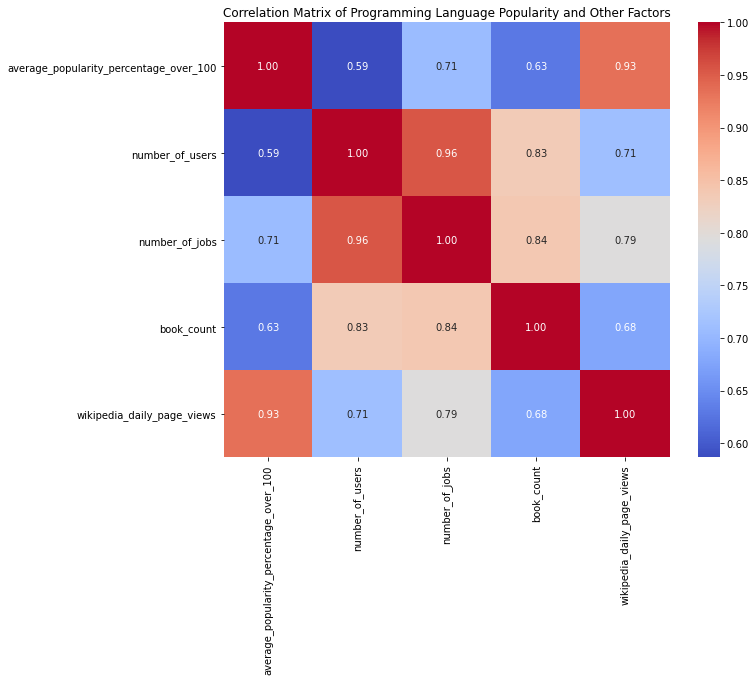

In [159]:
#lets visualize the correlations now

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Programming Language Popularity and Other Factors')
plt.show()

In [172]:
#now lets preform linear regression

scaler = StandardScaler()
features = ['number_of_users', 'number_of_jobs', 'wikipedia_daily_page_views']  
ultimateData.loc[:, features] = scaler.fit_transform(ultimateData[features])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [173]:
X = ultimateData[features]
y = ultimateData['average_popularity_percentage_over_100']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [174]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [175]:
y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 12.696369777220362
R-squared: -1.4715630087563465


In [176]:
print(f'Coefficients: {model.coef_}')

Coefficients: [-5.87173013  5.72695286  7.24927564]


In [177]:
# So the linear regression turned out to be massively inaccurate, this was to be expected
# With the help of GPT I tried to use a random forest model
X = ultimateData[['number_of_users', 'number_of_jobs', 'book_count', 'wikipedia_daily_page_views']]
y = ultimateData['average_popularity_percentage_over_100']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predicting test set results
y_pred = random_forest_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Getting feature importances
feature_importances = random_forest_model.feature_importances_
print("Feature Importances:", feature_importances)

Mean Squared Error: 5.360873559467453
R-squared: -0.04358466370223413
Feature Importances: [0.17151283 0.15562555 0.09710861 0.57575301]


In [178]:
# That also yielded not the best results so lets try a gradient boosting regressor with the help of GPT
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model
gb.fit(X_train, y_train)

# Evaluate the model
gb_score = gb.score(X_test, y_test)
gb_mse = mean_squared_error(y_test, gb.predict(X_test))

print("Gradient Boosting R-squared:", gb_score)
print("Gradient Boosting MSE:", gb_mse)

Gradient Boosting R-squared: 0.3644749672820621
Gradient Boosting MSE: 3.2646793909280665


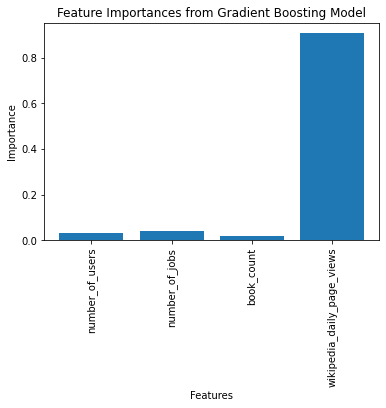

In [179]:
# That yields better results! Lets visualize!
# Now lets make a feature importance visualization
feature_names = X_train.columns

# Now plot the feature importances
plt.bar(feature_names, gb.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from Gradient Boosting Model')
plt.xticks(rotation=90)  
plt.show()